<a href="https://colab.research.google.com/github/sumitgaikwad8877/appliances-energy-prediction.ipynb/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes


date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)

lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in %

 T2, Temperature in living room area, in Celsius
 
RH2,Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH4,Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in %

 T6, Temperature outside the building (north side), in Celsius
 
RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius RH8,

Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in

Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (fromChievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

In [101]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/data_application_energy.csv',parse_dates=['date'])

# Reading Data

In [4]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
dataset.shape

(19735, 29)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [7]:
len(dataset)

19735

In [8]:
dataset.index

RangeIndex(start=0, stop=19735, step=1)

In [9]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


#  Check for NA

In [11]:
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [12]:
# duplicate
len(dataset[dataset.duplicated()])

0

# Data Visualistion

In [13]:
# To understand the timeseries variation of the applaince energy consumption
EData = go.Scatter( x= dataset.index  ,  mode = "lines", y = dataset.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[EData],layout=layout)

iplot(fig)

In [14]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
#setting the date index
dataset = dataset.set_index('date')

In [16]:
dataset['month'] = dataset.index.month
dataset['weekday'] = dataset.index.weekday
dataset['hour'] = dataset.index.hour
dataset['week'] = dataset.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [17]:
dataset.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17,2
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17,2
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17,2
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17,2
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17,2


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [19]:
dataset.shape

(19735, 32)

In [20]:
# Functions to be used from the plots

def daily(x,df=dataset):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=dataset):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=dataset):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

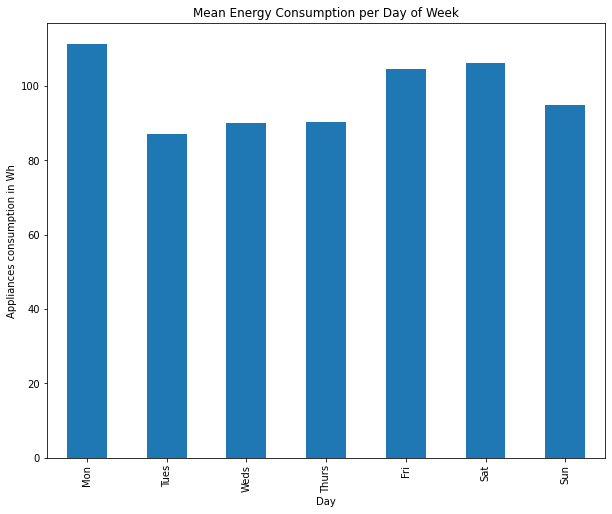

In [21]:
# Plot of Mean Energy Consumption per Day of Week
daily('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

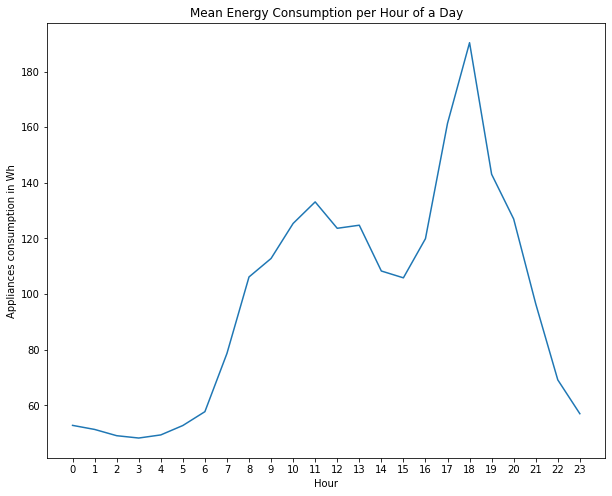

In [23]:
# Plot of Mean Energy Consumption per Hour of a Day

hourly('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks)
plt.show();

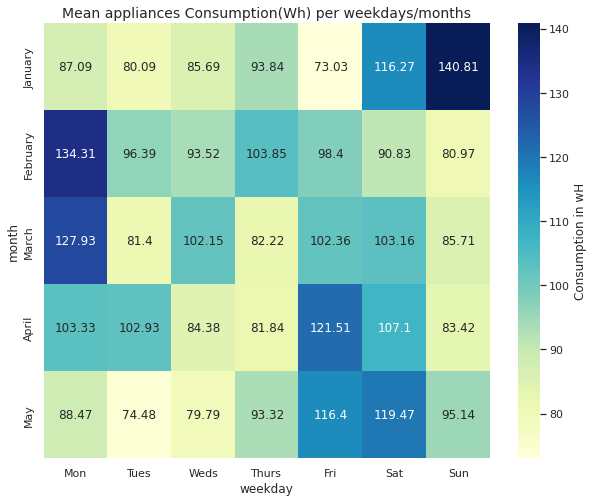

In [31]:
# Heatmap: Mean consumption per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Appliances').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekdays/months").set_fontsize('14')

plt.show()

The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 790 Wh.


Text(0.5, 1.0, 'Appliances energy consumption distribution')

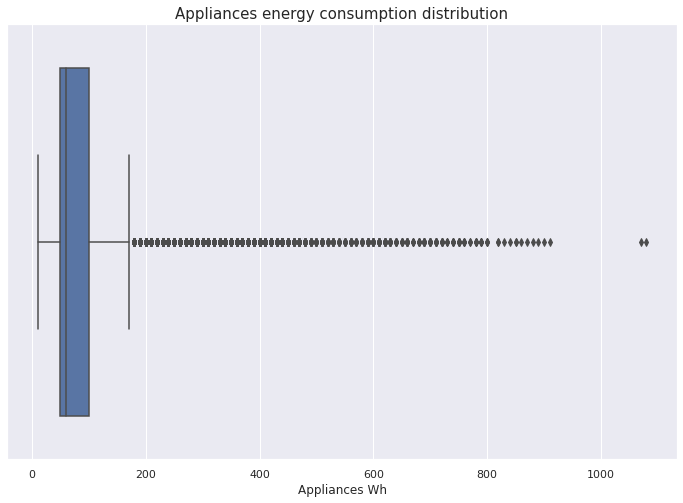

In [37]:
# Find outliers
sorted_appliances = dataset.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")
# boxplot appliances
plt.figure(figsize=(12,8))
sns.boxplot(x="Appliances", data=dataset)
plt.xlabel('Appliances Wh', fontsize=12)
plt.title("Appliances energy consumption distribution", fontsize=15)

In [38]:
# Outliers removal
dataset_1 = dataset.drop(dataset[(dataset.Appliances>790)|(dataset.Appliances<0)].index)
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [39]:
dataset_1=dataset_1.drop("month",axis=1)
dataset_1=dataset_1.drop("weekday",axis=1)
dataset_1=dataset_1.drop("week",axis=1)

In [41]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [43]:
dataset_1.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17


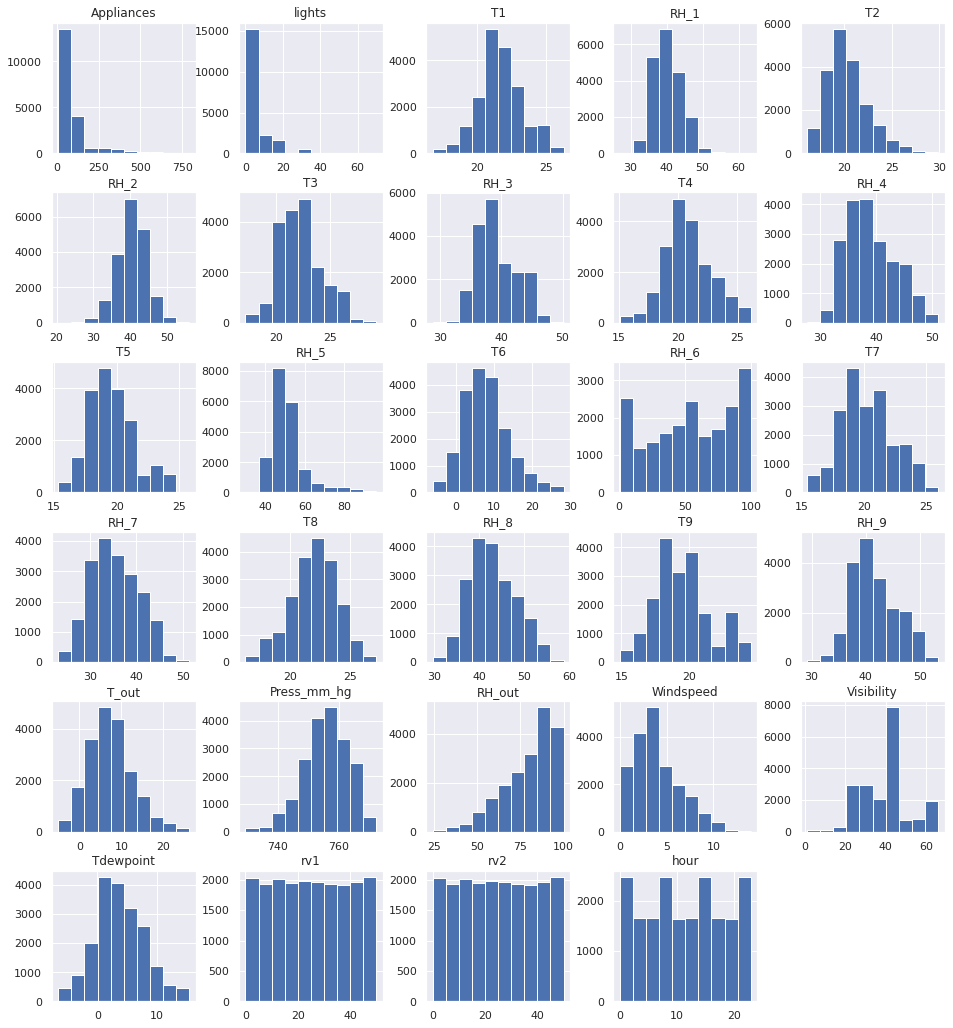

In [49]:
# Histogram of all the features to understand the distribution
dataset_1.hist(bins = 10 , figsize= (16,18)) ;

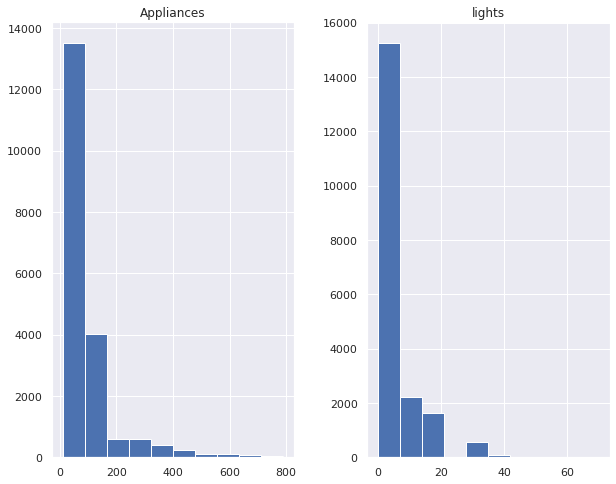

In [51]:
appliance = ["Appliances","lights"]
appliance=dataset_1[appliance]
appliance.hist(bins = 10 ) ;

In [52]:
# finding correlatin matrix of all the attributes
dataset_1.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour
Appliances,1.000000,0.198201,0.058996,0.087890,0.122590,-0.058680,0.088211,0.037644,0.043280,0.017365,...,-0.052405,0.102671,-0.039059,-0.155689,0.090528,-0.004157,0.017180,-0.012404,-0.012404,0.219468
lights,0.198201,1.000000,-0.022727,0.107266,-0.004990,0.051428,-0.096397,0.131253,-0.008049,0.115113,...,-0.008539,-0.073683,-0.011491,0.068215,0.060741,0.019347,-0.035632,0.000627,0.000627,0.255219
T1,0.058996,-0.022727,1.000000,0.163976,0.836827,-0.002565,0.892423,-0.028357,0.876984,0.098001,...,0.071834,0.682862,-0.149993,-0.345160,-0.087680,-0.075679,0.571435,-0.006107,-0.006107,0.178995
RH_1,0.087890,0.107266,0.163976,1.000000,0.269801,0.797675,0.253182,0.844803,0.105981,0.880435,...,0.763981,0.340586,-0.293908,0.274344,0.204946,-0.020756,0.639078,-0.000530,-0.000530,0.018695
T2,0.122590,-0.004990,0.836827,0.269801,1.000000,-0.165586,0.735194,0.121740,0.761939,0.231678,...,0.157388,0.792340,-0.132719,-0.505242,0.052724,-0.069587,0.582594,-0.010844,-0.010844,0.254971
RH_2,-0.058680,0.051428,-0.002565,0.797675,-0.165586,1.000000,0.137318,0.678418,-0.047445,0.721560,...,0.676492,0.033439,-0.255419,0.585199,0.068929,-0.004746,0.499169,0.006183,0.006183,-0.183140
T3,0.088211,-0.096397,0.892423,0.253182,0.735194,0.137318,1.000000,-0.011087,0.852852,0.122852,...,0.134633,0.699277,-0.189364,-0.281216,-0.101017,-0.101767,0.645966,-0.005355,-0.005355,0.037630
RH_3,0.037644,0.131253,-0.028357,0.844803,0.121740,0.678418,-0.011087,1.000000,-0.140469,0.899024,...,0.833593,0.118229,-0.233397,0.356199,0.263070,0.017251,0.414461,-0.000403,-0.000403,-0.052265
T4,0.043280,-0.008049,0.876984,0.105981,0.761939,-0.047445,0.852852,-0.140469,1.000000,-0.048743,...,-0.025754,0.663333,-0.074852,-0.388413,-0.185935,-0.104360,0.519326,-0.001759,-0.001759,0.088623
RH_4,0.017365,0.115113,0.098001,0.880435,0.231678,0.721560,0.122852,0.899024,-0.048743,1.000000,...,0.856563,0.293228,-0.250814,0.336899,0.300231,0.002871,0.616532,-0.001736,-0.001736,-0.018885


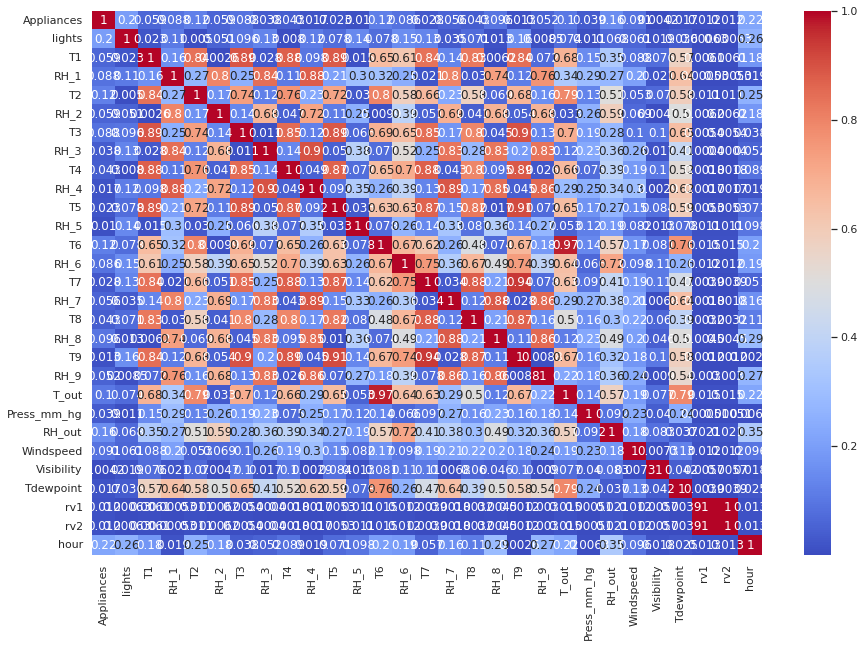

In [63]:
 ## Correlation
plt.figure(figsize=(15,10))
correlation = dataset_1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

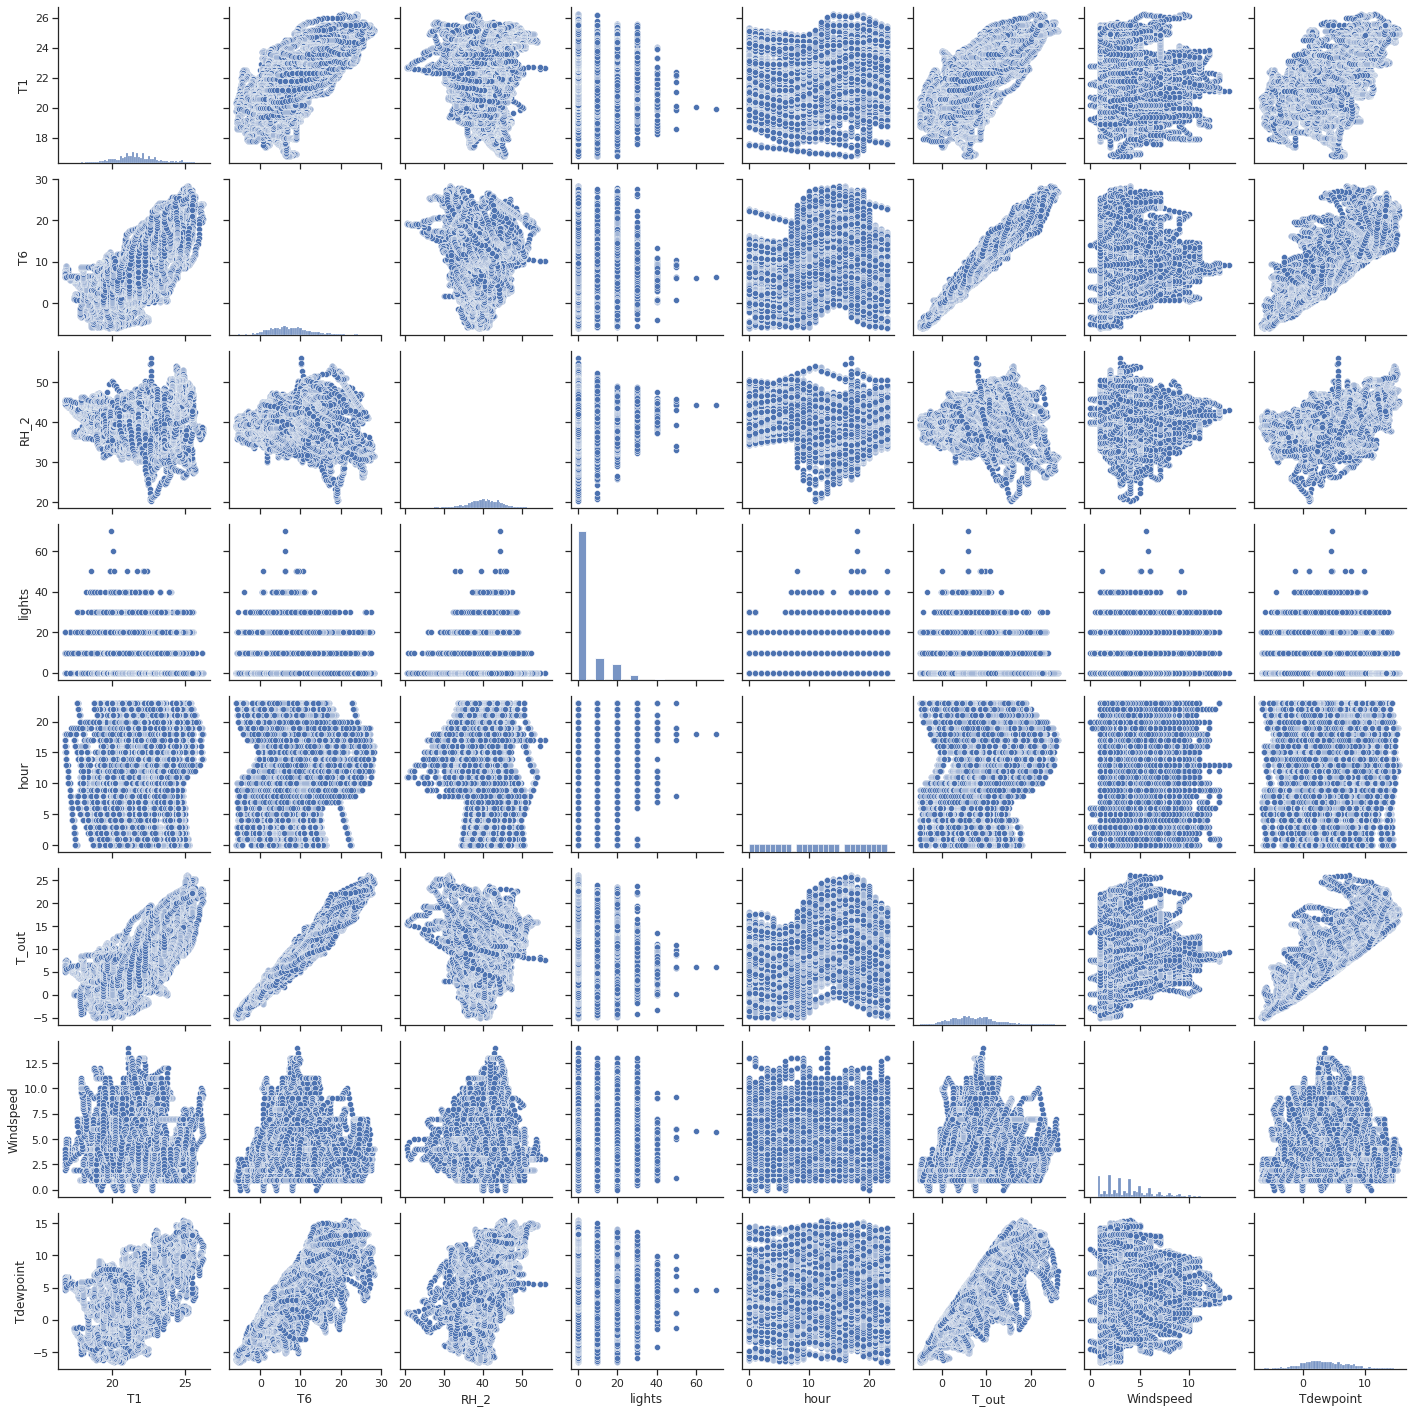

In [65]:
col = ["T1",'T6','RH_2','lights','hour','T_out','Windspeed','Tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset_1[col])
plt.show();

# Column Management

In [66]:
temperature = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
light = ["lights"]
hour=["hour"]
random = ["rv1", "rv2"]
appliance_1 = ["Appliances"]

In [91]:
feature=["T1","T2","T3","T4","T5","T6","RH_1","RH_2","RH_3","RH_5","RH_6",
          "Tdewpoint","RH_out","Press_mm_hg","Windspeed","lights"]
feature_1=dataset_1[feature]
target_1=dataset_1[appliance_1]

In [93]:
feature_1.head(5)

,T1,T2,T3,T4,T5,T6,RH_1,RH_2,RH_3,RH_5,RH_6,Tdewpoint,RH_out,Press_mm_hg,Windspeed,lights
date,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.89,19.2,19.79,19.000000,17.166667,7.026667,47.596667,44.790000,44.730000,55.20,84.256667,5.3,92.0,733.5,7.000000,30
2016-01-11 17:10:00,19.89,19.2,19.79,19.000000,17.166667,6.833333,46.693333,44.722500,44.790000,55.20,84.063333,5.2,92.0,733.6,6.666667,30
2016-01-11 17:20:00,19.89,19.2,19.79,18.926667,17.166667,6.560000,46.300000,44.626667,44.933333,55.09,83.156667,5.1,92.0,733.7,6.333333,30
2016-01-11 17:30:00,19.89,19.2,19.79,18.890000,17.166667,6.433333,46.066667,44.590000,45.000000,55.09,83.423333,5.0,92.0,733.8,6.000000,40
2016-01-11 17:40:00,19.89,19.2,19.79,18.890000,17.200000,6.366667,46.333333,44.530000,45.000000,55.09,84.893333,4.9,92.0,733.9,5.666667,40


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_1, target_1, test_size = 0.2, random_state = 0)


In [71]:
scaler = StandardScaler()

In [72]:
X_train=scaler.fit_transform(X_train)

In [73]:
X_test=scaler.transform(X_test)

In [75]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [95]:
cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

array([-8620.06018816, -8934.23189621, -9192.82221076, -8311.09204646,
       -9579.48269898])

In [81]:
mse=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

In [82]:
np.mean(mse)

-8927.537808115154

In [83]:
## prediction
reg_pred=regression.predict(X_test)


In [84]:
reg_pred

array([[ 59.75712808],
       [ 66.20813809],
       [ 94.8344317 ],
       ...,
       [113.61309709],
       [128.37979169],
       [ 97.99205406]])

In [86]:
score=r2_score(reg_pred,Y_test)

In [87]:
score

-3.9834926048447734

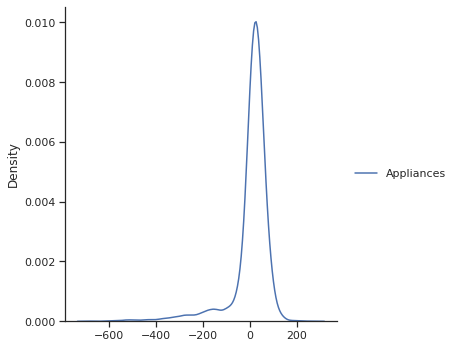

In [89]:
sns.displot(reg_pred-Y_test,kind='kde')